# To do list

[Weather data](#Weather-data)
- [x] t2m => t_air_i, t_air_24,t_air_min_24, t_air_max_24
- [ ] slp => p_air_i, p_air_24 
- [x] u10m,v10m => u_24, u_i
- [x] ps, qv2m => vp_24, vp_i **Using ps instead of deriving p_air from slp and DEM**

[Solar radiation](#Solar-radiation)
- [x] swgnt => ra_i, ra_24

Metadata: https://gmao.gsfc.nasa.gov/pubs/docs/Lucchesi1202.pdf

In [4]:
%run ..\Functions.ipynb

# Test

In [69]:
fh= r"E:\WaPORQA\GEOS5\tavg_2019-01-01.nc"
ds=xr.open_dataset(fh)
ds

<xarray.Dataset>
Dimensions:   (time: 24, lat: 321, lon: 305)
Coordinates:
  * time      (time) datetime64[ns] 2019-01-01T00:30:00 ... 2019-01-01T23:30:00
  * lat       (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.25 39.5 39.75 40.0
  * lon       (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.38 64.69 65.0
Data variables: (12/45)
    h250      (time, lat, lon) float32 ...
    q500      (time, lat, lon) float32 ...
    t250      (time, lat, lon) float32 ...
    qv10m     (time, lat, lon) float32 ...
    v50m      (time, lat, lon) float32 ...
    omega500  (time, lat, lon) float32 ...
    ...        ...
    troppv    (time, lat, lon) float32 ...
    troppt    (time, lat, lon) float32 ...
    disph     (time, lat, lon) float32 ...
    h500      (time, lat, lon) float32 ...
    slp       (time, lat, lon) float32 ...
    tropt     (time, lat, lon) float32 ...
Attributes:
    title:                GEOS5 FP 2d time-averaged single level diagnostics
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Mon Nov 13 23:40:11 UTC 2023 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

## Test air pressure

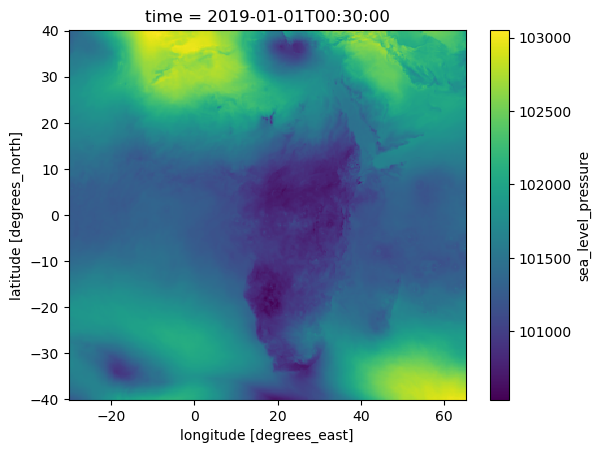

In [70]:
ds.slp[0].plot()

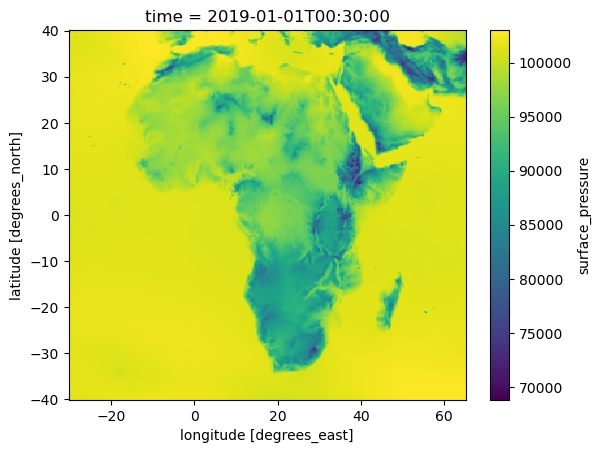

In [71]:
ds.ps[0].plot()

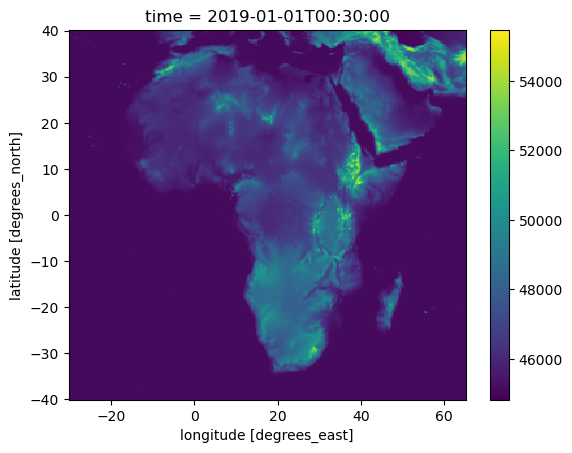

In [ ]:
# Reverse  air_pressure function to calculate dem from p_air_0 and p_air
p_air_0=Pa_to_mbar(ds.slp[0])
p_air=Pa_to_mbar(ds.ps[0])
dem0= ((((np.log(p_air/p_air_0)/np.log(c.power))*c.t_ref)-c.t_ref)/c.lapse)+c.z_ref
dem0.plot()

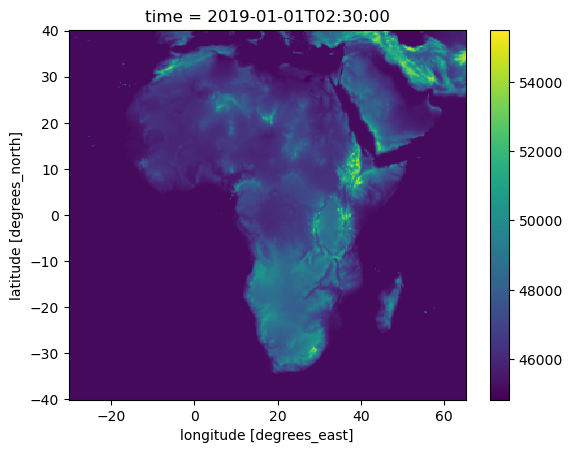

In [ ]:
# Reverse  air_pressure function to calculate dem from p_air_0 and p_air
p_air_0=Pa_to_mbar(ds.slp[2])
p_air=Pa_to_mbar(ds.ps[2])
dem= ((((np.log(p_air/p_air_0)/np.log(c.power))*c.t_ref)-c.t_ref)/c.lapse)+c.z_ref
dem.plot()

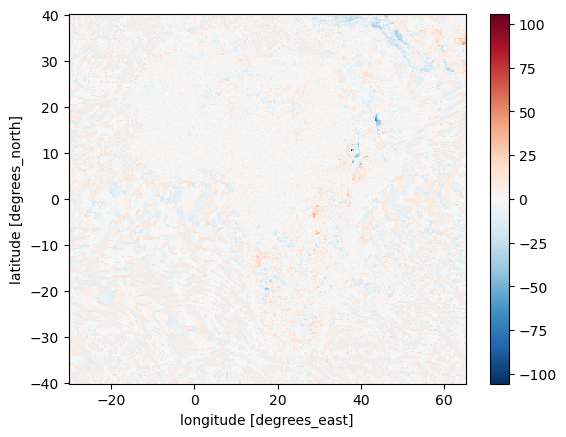

In [ ]:
diff=dem-dem0
diff.plot()

**notes**: GEOS5 ps seems to be calculated from slp and a DEM

## Calculate weather variables

In [ ]:
p_air_0 = Pa_to_mbar(ds.slp,attrs={'input':'GEOS5 tavg1_2d_slv_Nx slp'})
# p_air = air_pressure(z, ds.p_air_0, attrs={**p_air_0.attrs,
#                                           'dem':''})
p_air=Pa_to_mbar(ds.ps,  attrs={'input':'GEOS5 tavg1_2d_slv_Nx ps'})
save_ds = xr.Dataset({'t_air': kelvin_to_celsius(ds.t2m,
                                                attrs={**ds.t2m.attrs, 
                                                       'input':'GEOS5 tavg1_2d_slv_Nx t2m'}
                                                ), 
                      'p_air_0': p_air_0,
                     'p_air': p_air,
                     'u': windspeed_from_components(ds.u10m,ds.v10m,
                                                    attrs={'input':'GEOS5 tavg1_2d_slv_Nx u10m v10m',
                                                          'unit': 'm s-1'}
                                                   ),
                     'vp': vapour_pressure_from_specific_humidity(p_air,ds.qv2m,
                                                    attrs={'input':'GEOS5 tavg1_2d_slv_Nx qv2m ps'}     
                                                                 ),
                      # 'ra': ds
                     })

In [78]:
save_ds.vp

<xarray.DataArray 'vp' (time: 24, lat: 321, lon: 305)>
array([[[16.901424 , 16.18132  , 15.719459 , ..., 11.431783 ,
         11.507548 , 11.368645 ],
        [16.936958 , 16.241245 , 15.769153 , ..., 11.633824 ,
         11.646451 , 11.595941 ],
        [16.912111 , 16.216396 , 15.803979 , ..., 11.772727 ,
         11.760099 , 11.873748 ],
        ...,
        [14.32803  , 14.899508 , 15.281863 , ...,  4.007787 ,
          4.616976 ,  5.997625 ],
        [14.377724 , 14.9740505, 15.232139 , ...,  4.2519393,
          4.5056934,  5.7393594],
        [14.5672865, 15.123132 , 15.257    , ...,  4.119782 ,
          4.4090133,  5.423921 ]],

       [[17.293037 , 17.019968 , 16.374533 , ..., 11.434851 ,
         11.472747 , 11.409587 ],
        [17.24339  , 16.956213 , 16.38489  , ..., 11.649595 ,
         11.636964 , 11.472747 ],
        [17.130095 , 16.931374 , 16.211008 , ..., 11.826444 ,
         11.80118  , 11.763284 ],
...
        [18.19186  , 18.22821  , 18.165144 , ...,  4.3364186,
          4.2518706,  4.2565427],
        [18.042881 , 17.979752 , 17.941391 , ...,  4.268913 ,
          4.196033 ,  4.272097 ],
        [17.968391 , 17.905214 , 17.841946 , ...,  4.202162 ,
          4.2097373,  4.234637 ]],

       [[12.843782 , 12.693522 , 12.618393 , ..., 12.433712 ,
         12.370515 , 12.471629 ],
        [13.081694 , 12.731088 , 12.743609 , ..., 12.610662 ,
         12.496909 , 12.471629 ],
        [13.282039 , 12.706045 , 12.643436 , ..., 12.686499 ,
         12.484269 , 12.370515 ],
        ...,
        [18.279089 , 18.315489 , 18.277355 , ...,  4.3342633,
          4.2864547,  4.2679806],
        [18.130148 , 18.116776 , 18.028807 , ...,  4.2974515,
          4.2858257,  4.2957244],
        [17.956383 , 17.99258  , 17.929388 , ...,  4.2763085,
          4.3726306,  4.2885103]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01T00:30:00 ... 2019-01-01T23:30:00
  * lat      (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.25 39.5 39.75 40.0
  * lon      (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.06 64.38 64.69 65.0
Attributes:
    input:      GEOS5 tavg1_2d_slv_Nx qv2m ps
    long_name:  actual_vapour_pressure
    unit:       mbar
    method:     pywapor.et_look_v2_v3.vapour_pressure_from_specific_humidity

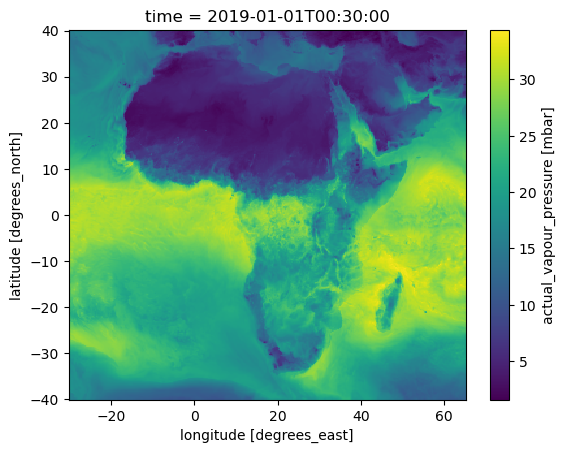

In [79]:
save_ds.vp[0].plot()

In [80]:
save_ds.vp

<xarray.DataArray 'vp' (time: 24, lat: 321, lon: 305)>
array([[[16.901424 , 16.18132  , 15.719459 , ..., 11.431783 ,
         11.507548 , 11.368645 ],
        [16.936958 , 16.241245 , 15.769153 , ..., 11.633824 ,
         11.646451 , 11.595941 ],
        [16.912111 , 16.216396 , 15.803979 , ..., 11.772727 ,
         11.760099 , 11.873748 ],
        ...,
        [14.32803  , 14.899508 , 15.281863 , ...,  4.007787 ,
          4.616976 ,  5.997625 ],
        [14.377724 , 14.9740505, 15.232139 , ...,  4.2519393,
          4.5056934,  5.7393594],
        [14.5672865, 15.123132 , 15.257    , ...,  4.119782 ,
          4.4090133,  5.423921 ]],

       [[17.293037 , 17.019968 , 16.374533 , ..., 11.434851 ,
         11.472747 , 11.409587 ],
        [17.24339  , 16.956213 , 16.38489  , ..., 11.649595 ,
         11.636964 , 11.472747 ],
        [17.130095 , 16.931374 , 16.211008 , ..., 11.826444 ,
         11.80118  , 11.763284 ],
...
        [18.19186  , 18.22821  , 18.165144 , ...,  4.3364186,
          4.2518706,  4.2565427],
        [18.042881 , 17.979752 , 17.941391 , ...,  4.268913 ,
          4.196033 ,  4.272097 ],
        [17.968391 , 17.905214 , 17.841946 , ...,  4.202162 ,
          4.2097373,  4.234637 ]],

       [[12.843782 , 12.693522 , 12.618393 , ..., 12.433712 ,
         12.370515 , 12.471629 ],
        [13.081694 , 12.731088 , 12.743609 , ..., 12.610662 ,
         12.496909 , 12.471629 ],
        [13.282039 , 12.706045 , 12.643436 , ..., 12.686499 ,
         12.484269 , 12.370515 ],
        ...,
        [18.279089 , 18.315489 , 18.277355 , ...,  4.3342633,
          4.2864547,  4.2679806],
        [18.130148 , 18.116776 , 18.028807 , ...,  4.2974515,
          4.2858257,  4.2957244],
        [17.956383 , 17.99258  , 17.929388 , ...,  4.2763085,
          4.3726306,  4.2885103]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01T00:30:00 ... 2019-01-01T23:30:00
  * lat      (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.25 39.5 39.75 40.0
  * lon      (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.06 64.38 64.69 65.0
Attributes:
    input:      GEOS5 tavg1_2d_slv_Nx qv2m ps
    long_name:  actual_vapour_pressure
    unit:       mbar
    method:     pywapor.et_look_v2_v3.vapour_pressure_from_specific_humidity

## Solar radiation

In [5]:
fh= r"E:\WaPORQA\GEOS5\tavg1_2d_rad_Nx\2019-01-01.nc"
ds=xr.open_dataset(fh)
ds

<xarray.Dataset>
Dimensions:  (time: 24, lat: 321, lon: 305)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01T00:30:00 ... 2019-01-01T23:30:00
  * lat      (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.25 39.5 39.75 40.0
  * lon      (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.06 64.38 64.69 65.0
Data variables:
    swgdn    (time, lat, lon) float32 ...
Attributes:
    title:                GEOS5 FP 2d time-averaged radiation diagnostics
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Thu Nov 16 16:42:42 UTC 2023 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

In [6]:
ra=ds.swgdn

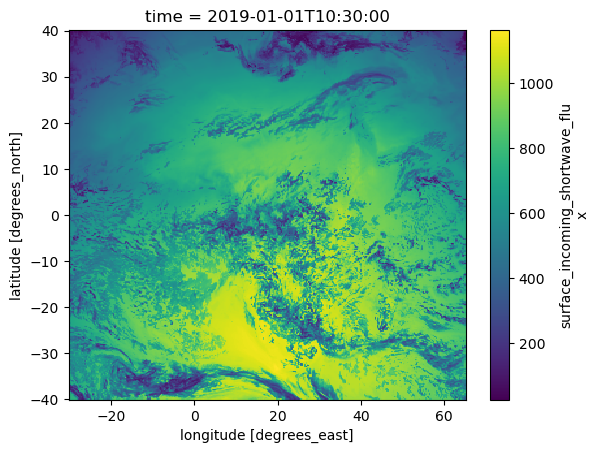

In [8]:
ra[10].plot() # at 10am

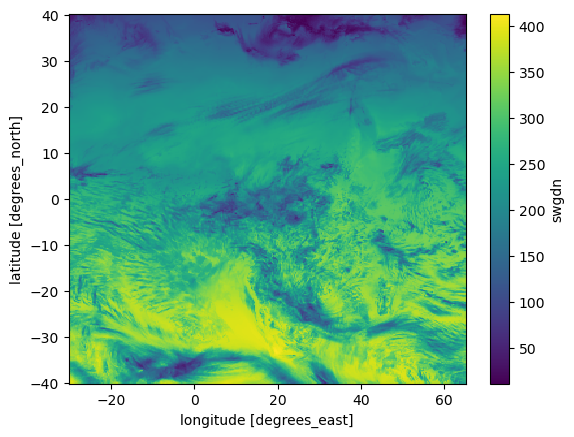

In [11]:
ra_d= ra.mean(dim='time').compute()
ra_d.plot()

# tavg1_2d

In [3]:
# import the datetime module
import datetime

folder=r"E:\WaPORQA\GEOS5"
save_folder=r"E:\WaPORQA\GEOS5\Processed"
# create a range of dates from 2018-01-01 to 2022-12-31
start_date = datetime.date(2022, 8, 14)  #to be continued. 24/11
end_date = datetime.date(2022, 12, 31)
date_range = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# for each date print a string with this format YYYYMMDD
for date in date_range:
    datestr=date.strftime("%Y-%m-%d")
    day_fhs=glob.glob(os.path.join(folder,'tavg1_2d_slv_Nx',
                                   '*{0}*.nc'.format(datestr))) + \
        glob.glob(os.path.join(folder,'tavg1_2d_rad_Nx',
                                       '*{0}*.nc'.format(datestr)))
    ds=xr.open_mfdataset(day_fhs)
    p_air_0 = Pa_to_mbar(ds.slp,attrs={'input':'GEOS5 tavg1_2d_slv_Nx slp'})
    # p_air = air_pressure(z, ds.p_air_0, attrs={**p_air_0.attrs,
    #                                           'dem':''})
    p_air=Pa_to_mbar(ds.ps,  attrs={'input':'GEOS5 tavg1_2d_slv_Nx ps'})
    ra_w = ds.swgdn
    ra_w.attrs={'input':'GEOS5 tavg1_2d_rad_Nx swgdn',
               'units' : 'W m-2'}
    
    save_ds = xr.Dataset({'t_air': kelvin_to_celsius(ds.t2m,
                                                    attrs={**ds.t2m.attrs, 
                                                           'input':'GEOS5 tavg1_2d_slv_Nx t2m'}
                                                    ), 
                          'p_air_0': p_air_0,
                         'p_air': p_air,
                         'u': windspeed_from_components(ds.u10m,ds.v10m,
                                                        attrs={'input':'GEOS5 tavg1_2d_slv_Nx u10m v10m',
                                                              'unit': 'm s-1'}
                                                       ),
                         'vp': vapour_pressure_from_specific_humidity(p_air,ds.qv2m,
                                                        attrs={'input':'GEOS5 tavg1_2d_slv_Nx qv2m ps'}     
                                                                     ),
                          'ra': ra_w
                         })
    results = save_ds.compute()
    filepath=os.path.join(save_folder,datestr+"_t-p-u-vp-ra.nc")
    results.to_netcdf(filepath)
                          


# tavg3_2d